In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils

import os
import pandas as pd
import matplotlib

In [3]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_scratch/pseudo"

SESSIONS_PATH = "/data/patrick_scratch/multi_sess/valid_sessions.pickle"

FEATURE_DIMS = ["COLOR", "SHAPE", "PATTERN"]

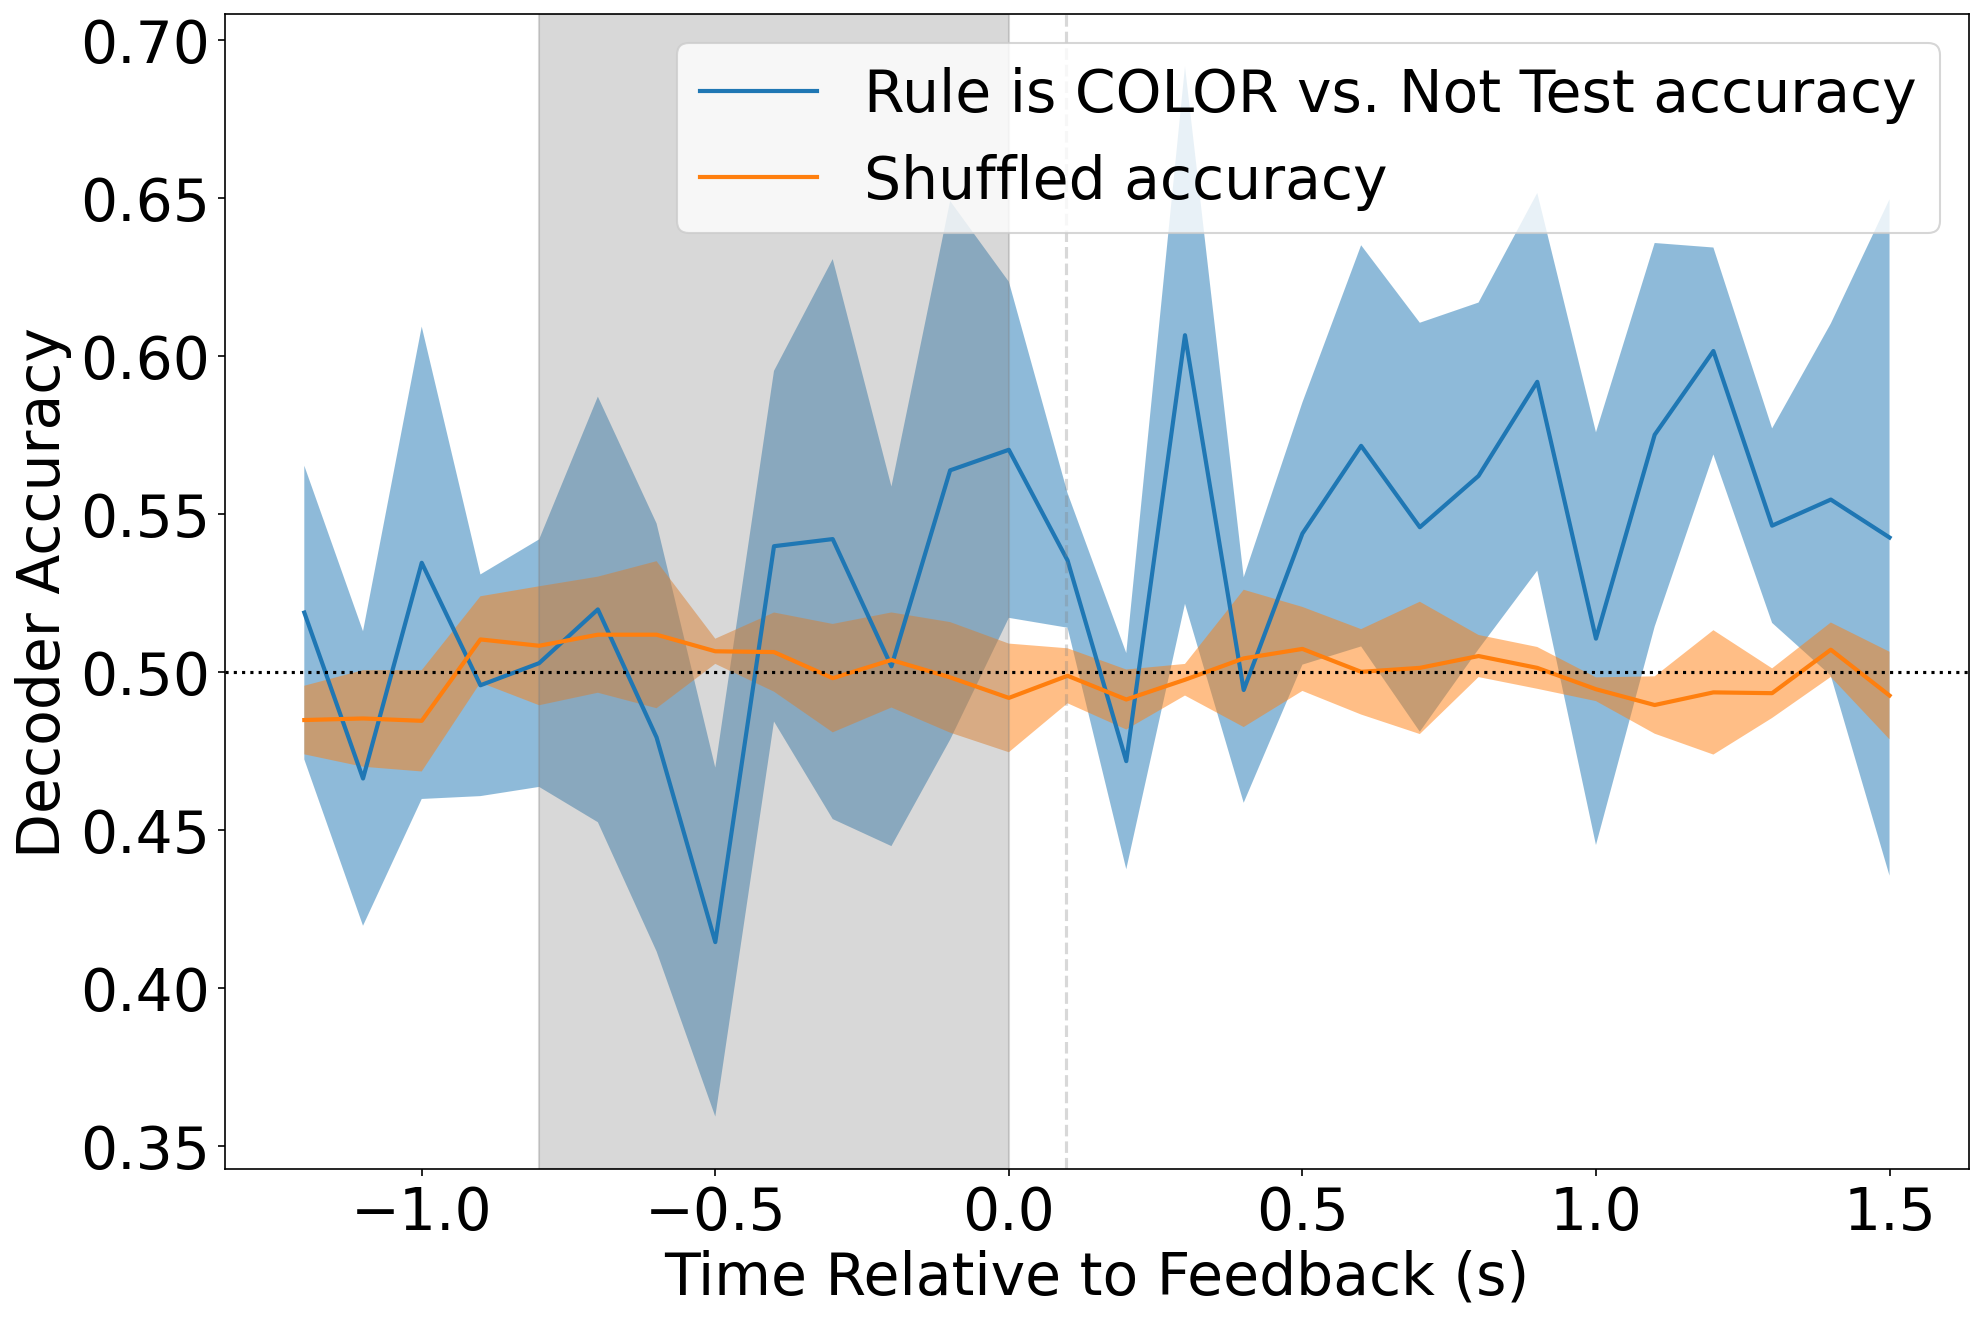

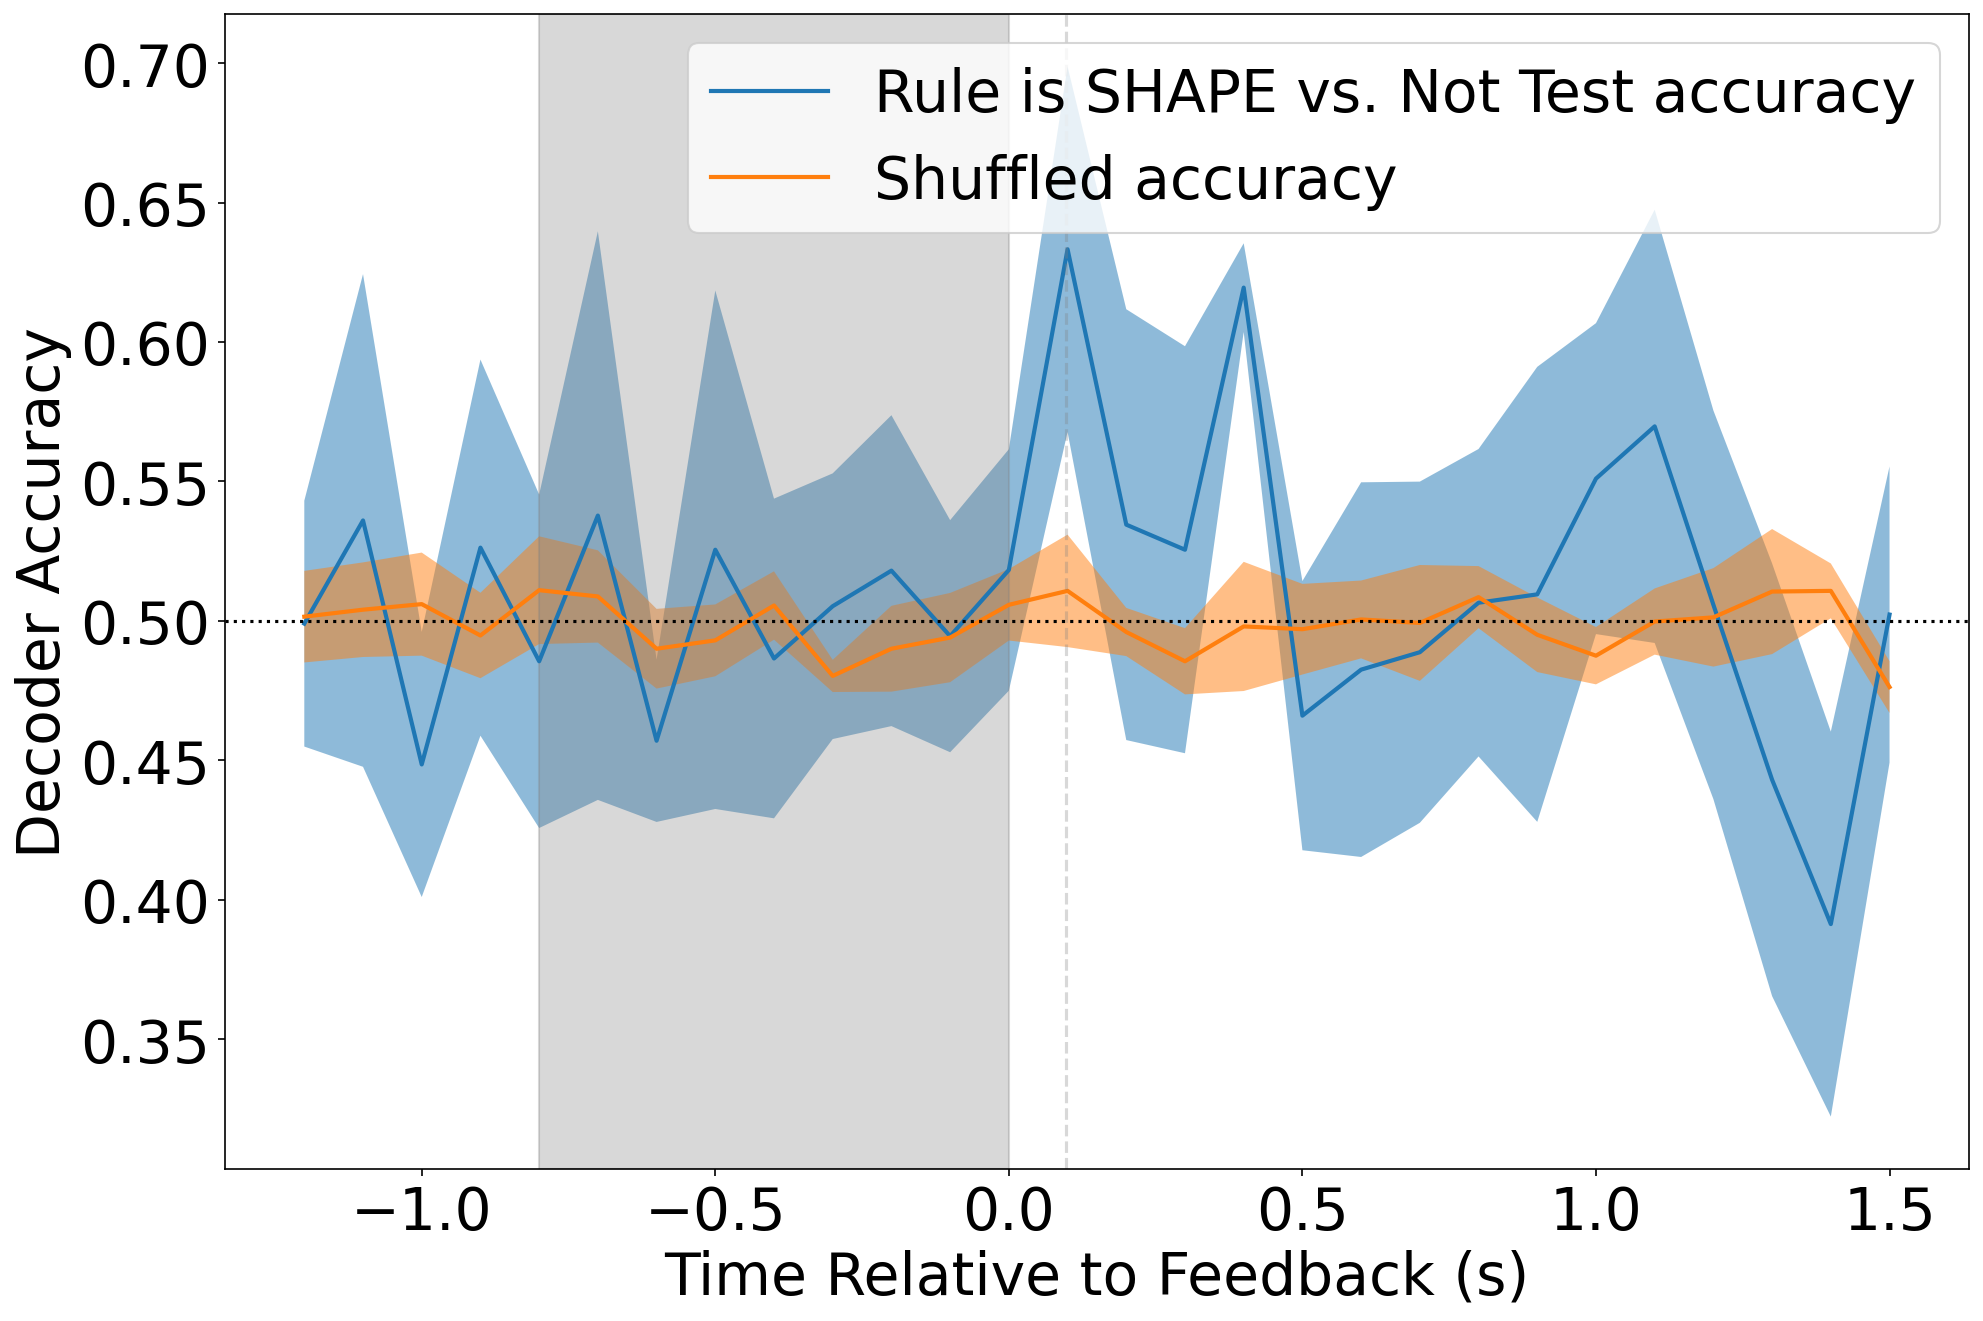

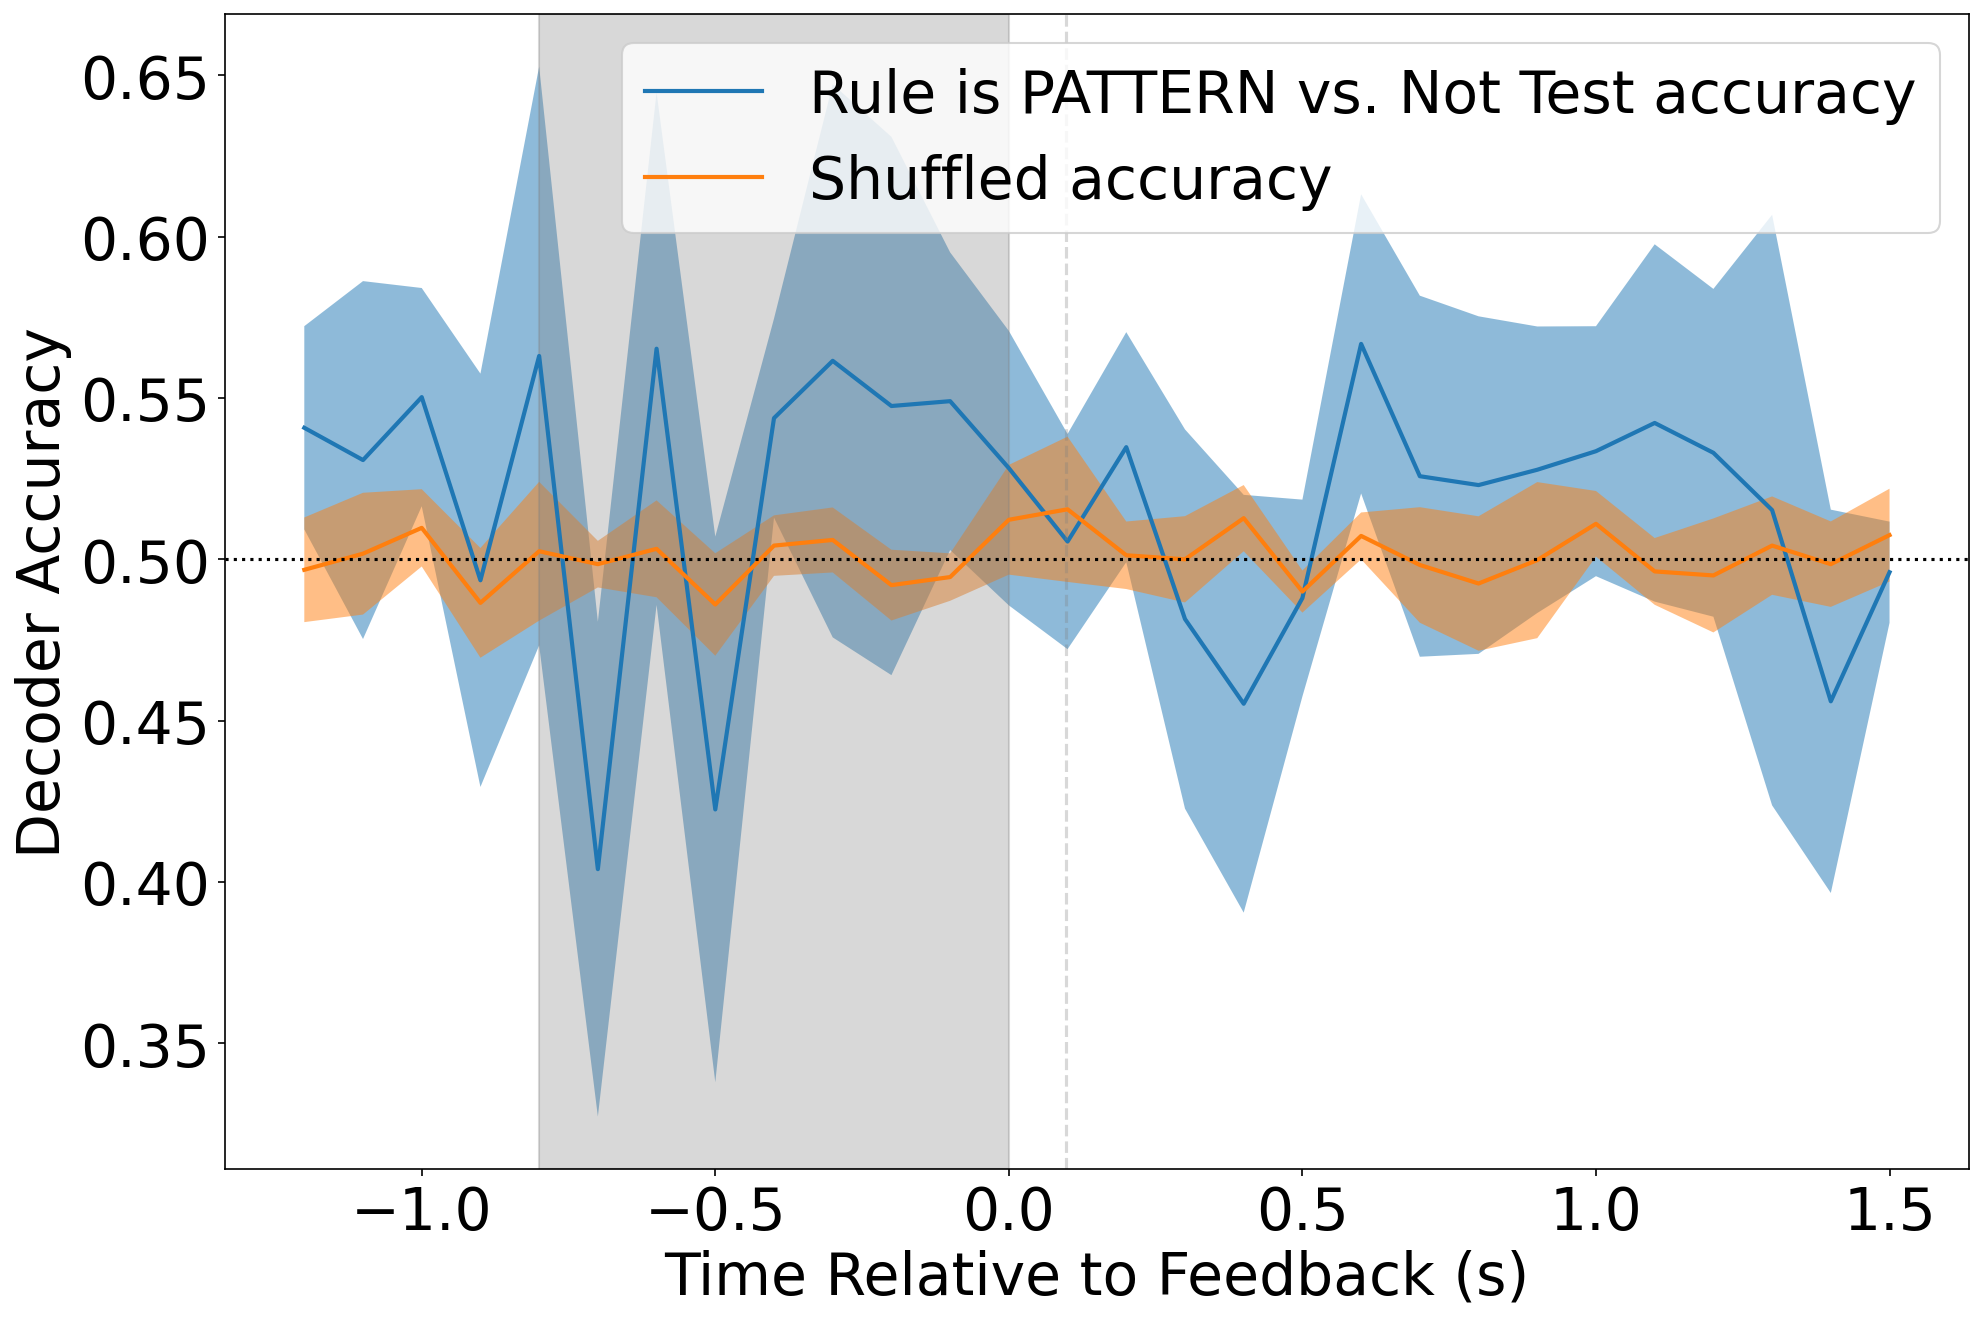

In [4]:
matplotlib.rcParams.update({'font.size': 28})


for feature_dim in FEATURE_DIMS:
    # plots the mean and standard deviation of decoding accuracy across splits, by time. 
    fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
    # load the test accuracy of generated from the decode_features_with_pseudo.py script
    # here I'm just visualizing test accuracy, but can very well visualize train/shuffled as well. 
    test_accs = np.load(os.path.join(OUTPUT_DIR, f"rule_dim_matches_{feature_dim}_cor_only_test_accs.npy"))
    train_accs = np.load(os.path.join(OUTPUT_DIR, f"rule_dim_matches_{feature_dim}_cor_only_train_accs.npy"))
    shuffled_accs = np.load(os.path.join(OUTPUT_DIR, f"rule_dim_matches_{feature_dim}_cor_only_shuffled_accs.npy"))
    visualization_utils.visualize_accuracy_across_time_bins(
        test_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"Rule is {feature_dim} vs. Not Test accuracy",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        shuffled_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"Shuffled accuracy",
        right_align=True, 
    )
    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

### SVM?

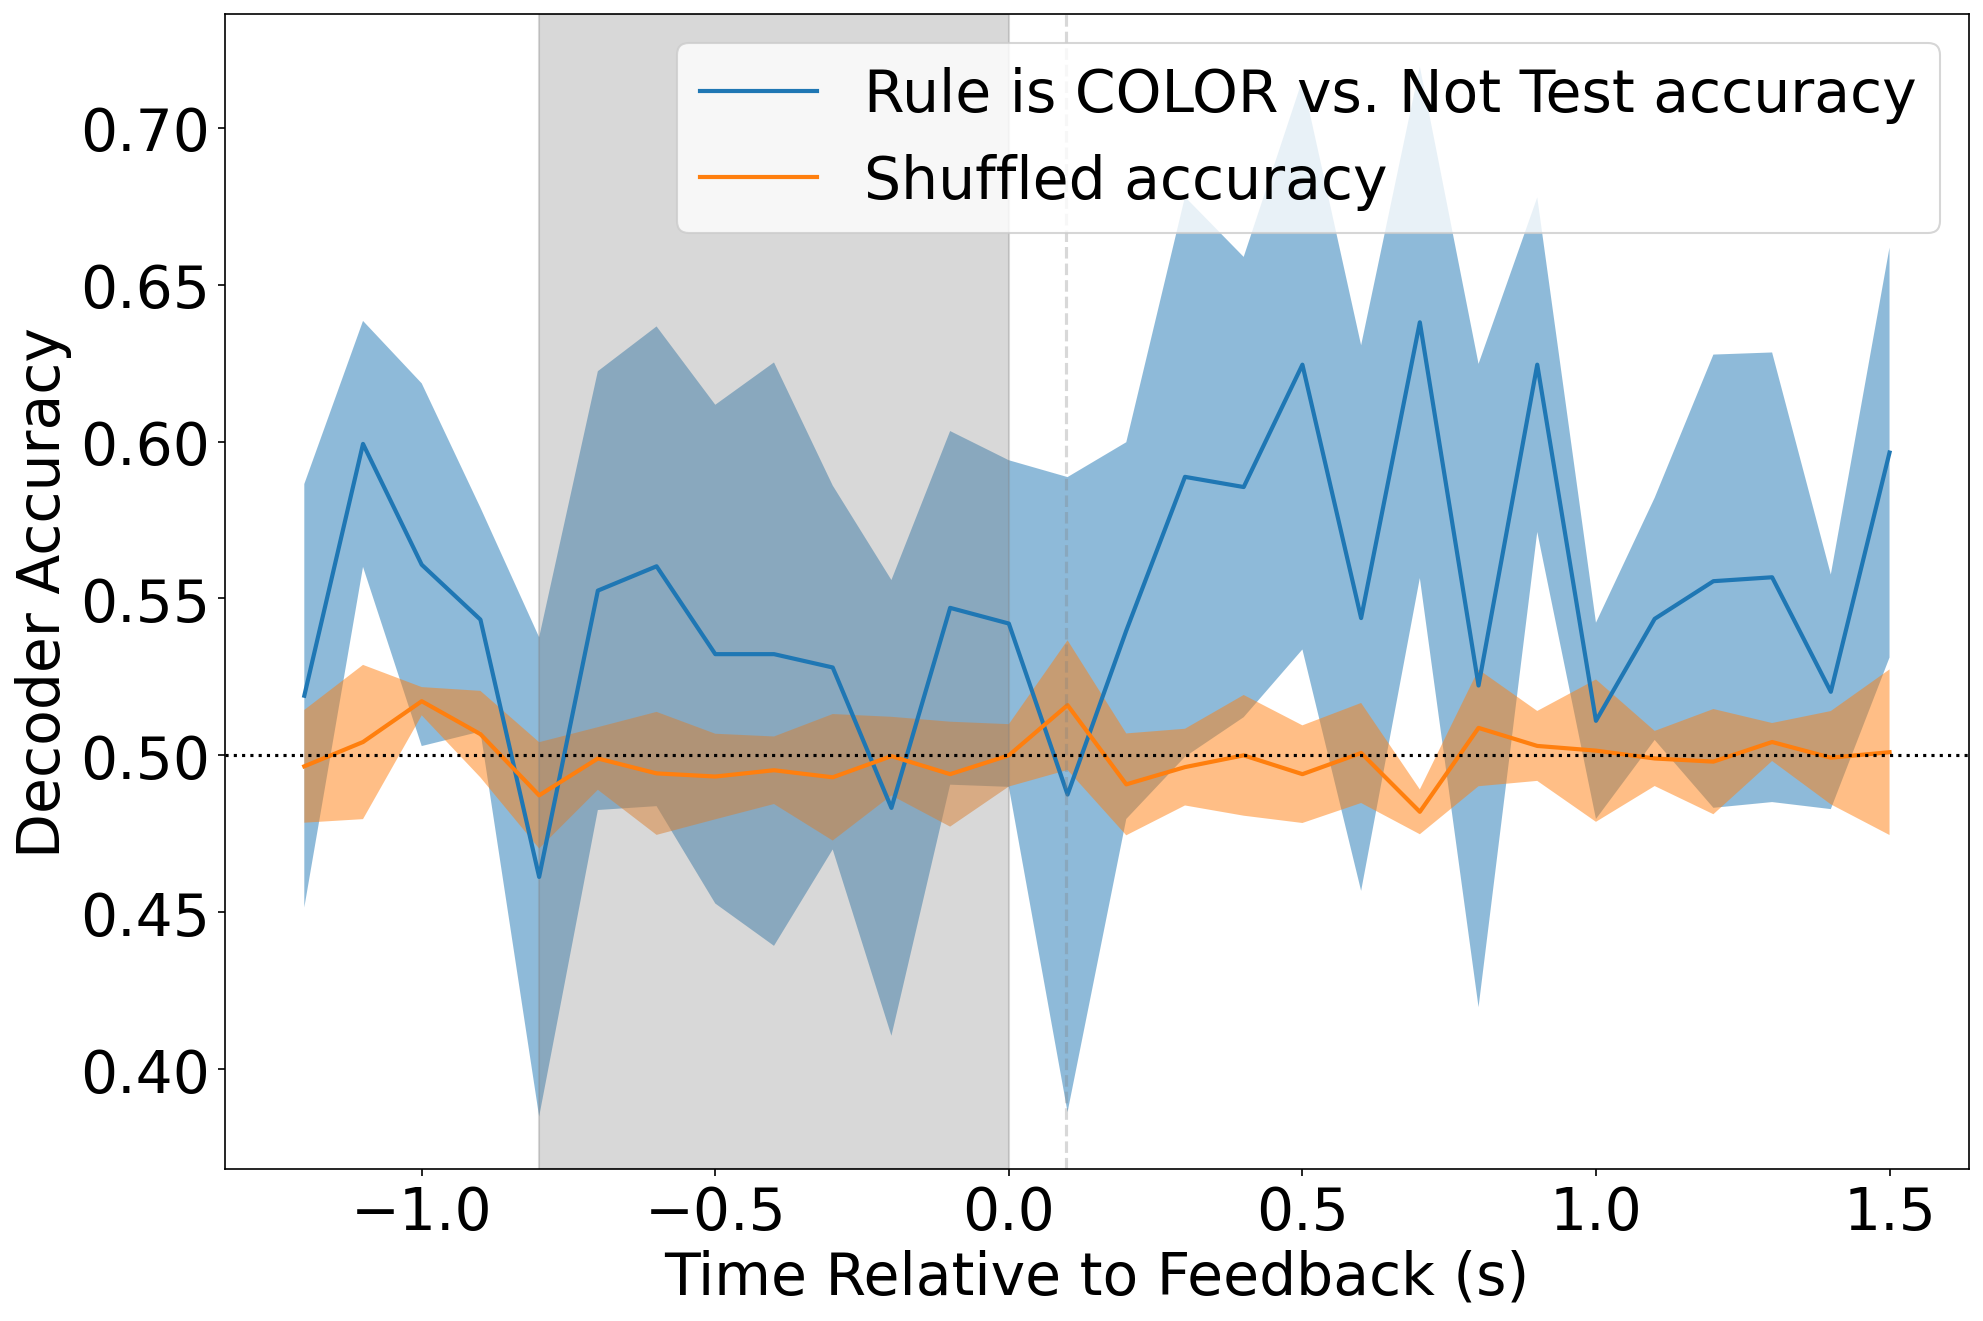

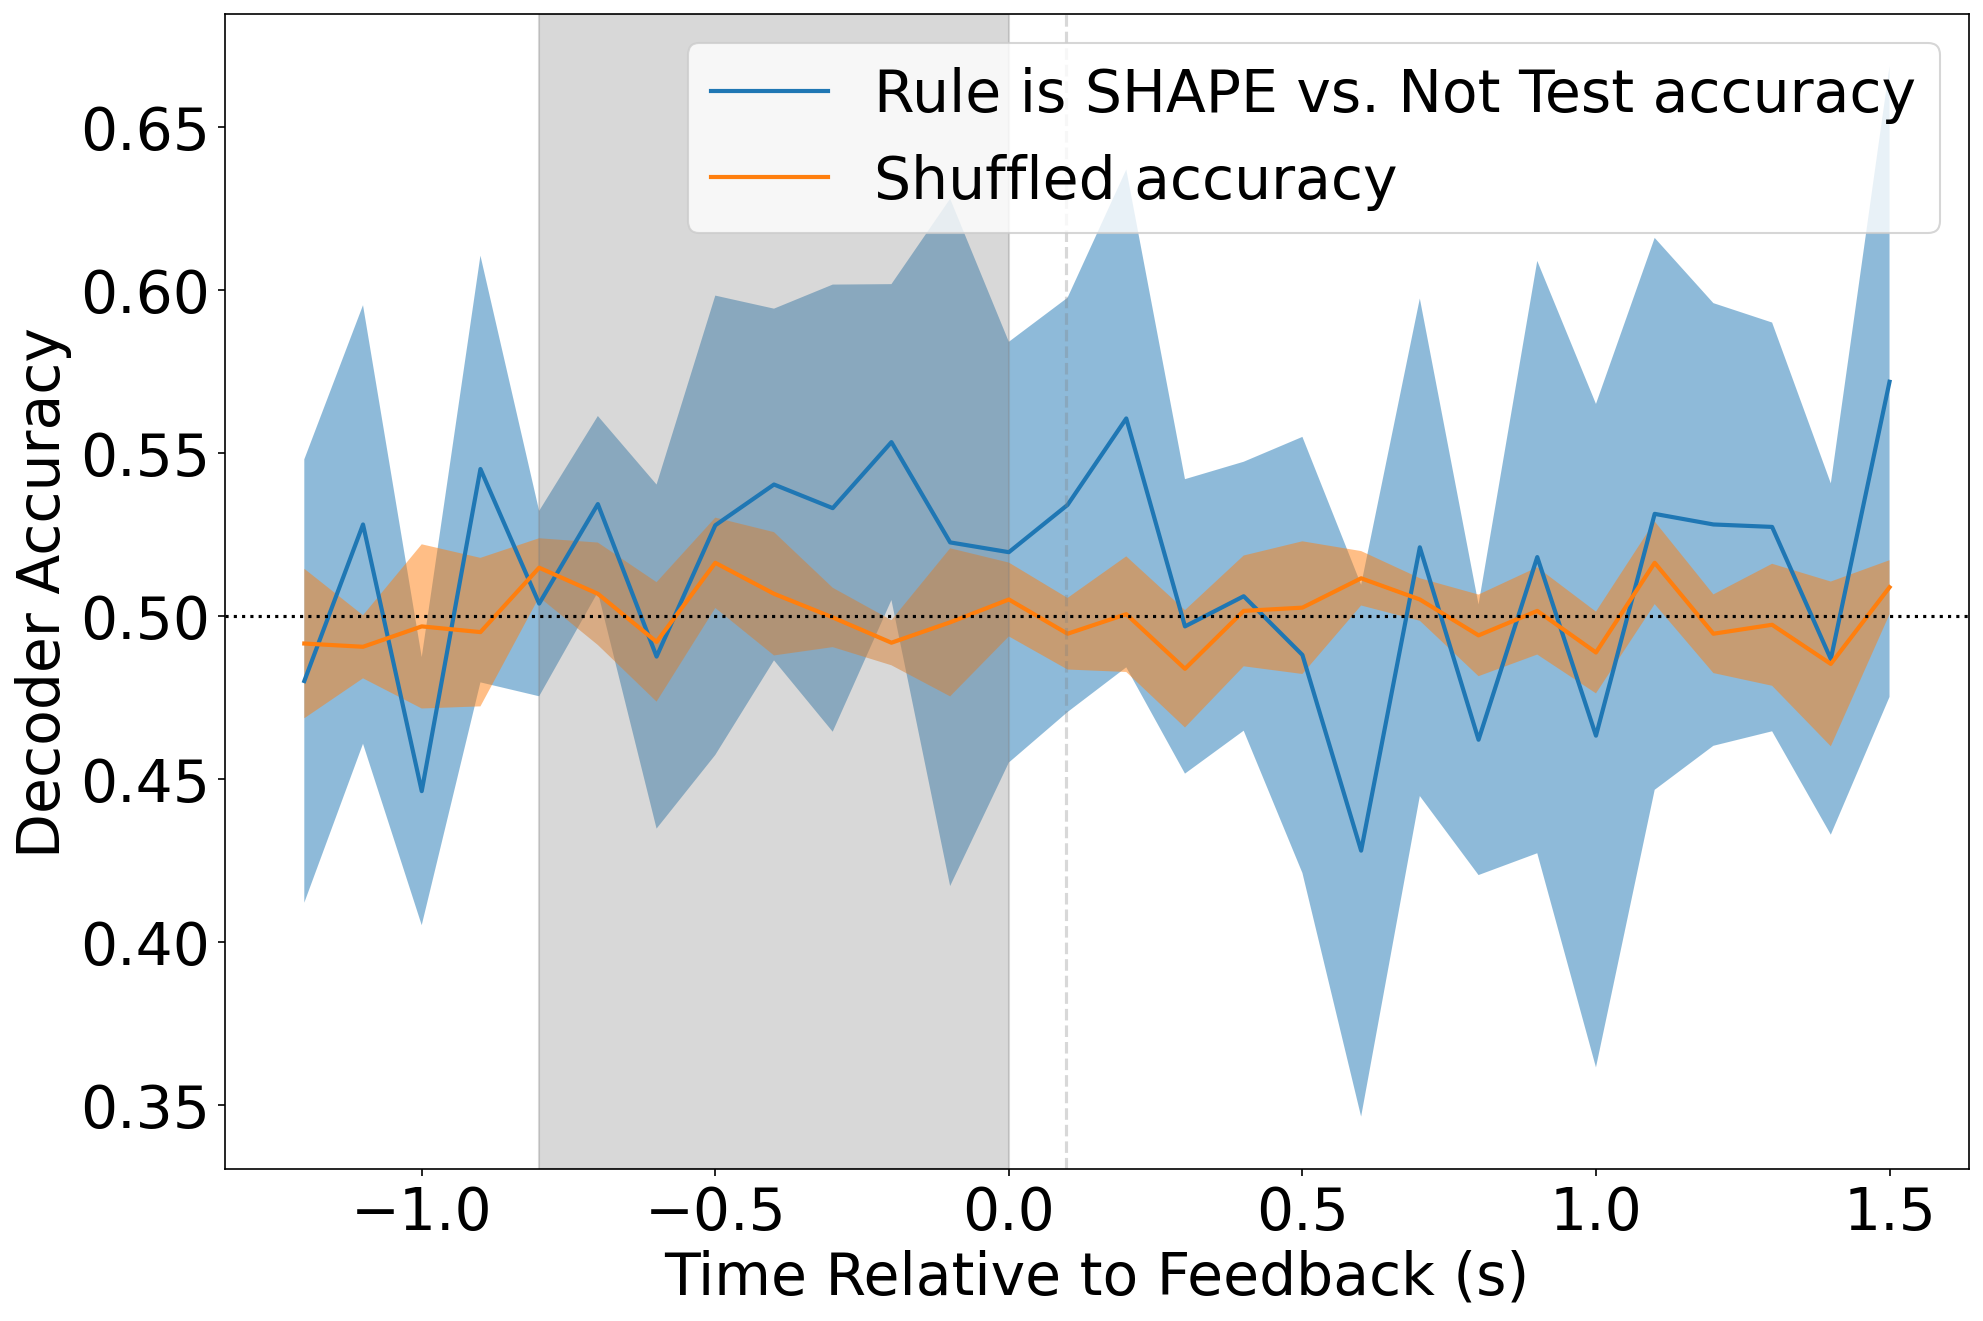

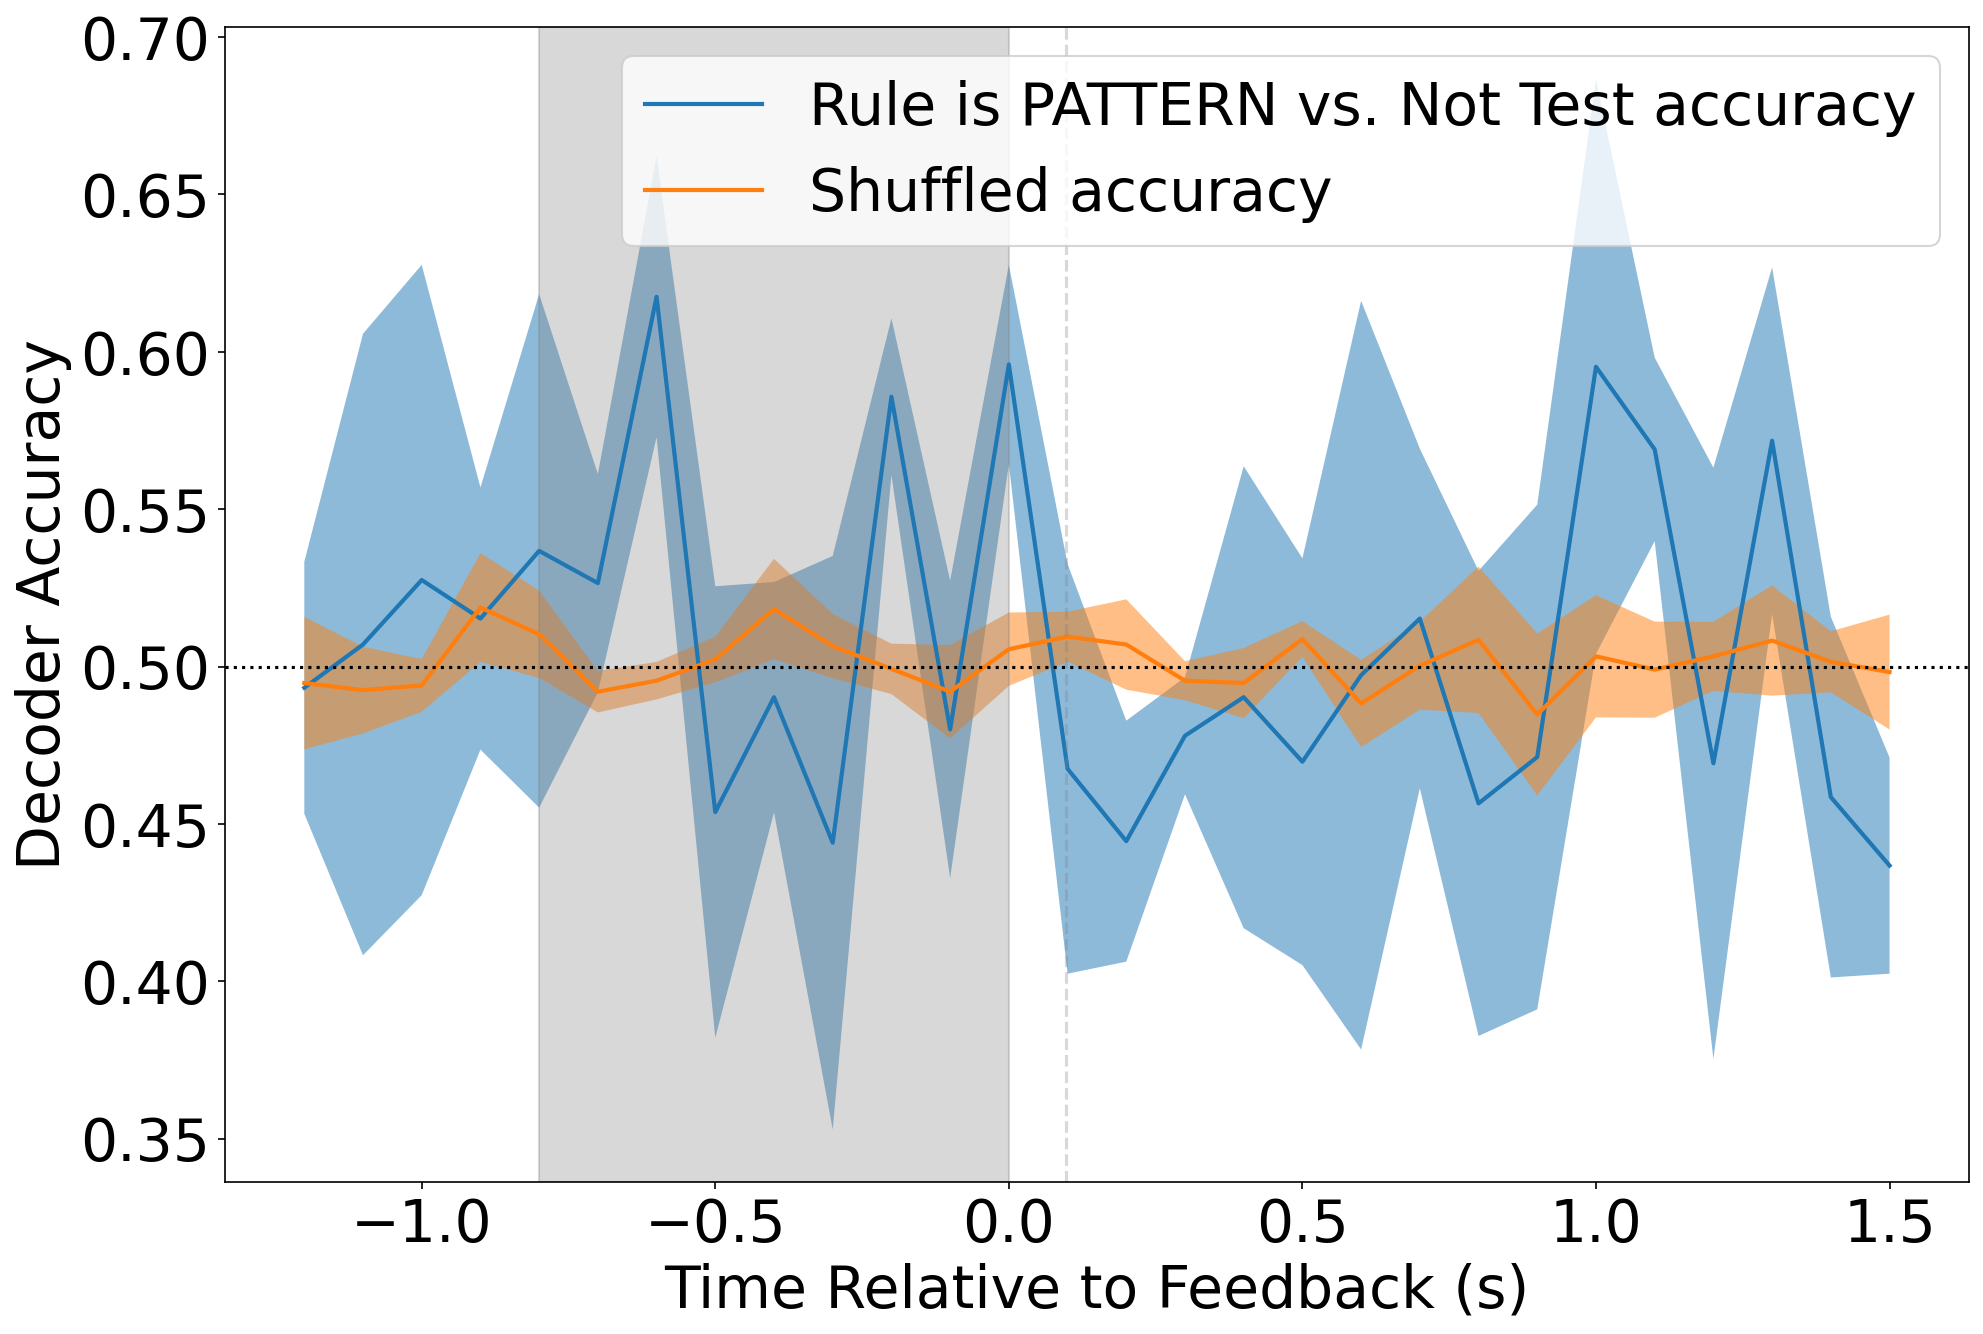

In [5]:
matplotlib.rcParams.update({'font.size': 28})


for feature_dim in FEATURE_DIMS:
    # plots the mean and standard deviation of decoding accuracy across splits, by time. 
    fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
    # load the test accuracy of generated from the decode_features_with_pseudo.py script
    # here I'm just visualizing test accuracy, but can very well visualize train/shuffled as well. 
    test_accs = np.load(os.path.join(OUTPUT_DIR, f"rule_dim_matches_{feature_dim}_cor_only_svm_test_accs.npy"))
    train_accs = np.load(os.path.join(OUTPUT_DIR, f"rule_dim_matches_{feature_dim}_cor_only_svm_train_accs.npy"))
    shuffled_accs = np.load(os.path.join(OUTPUT_DIR, f"rule_dim_matches_{feature_dim}_cor_only_svm_shuffled_accs.npy"))
    visualization_utils.visualize_accuracy_across_time_bins(
        test_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"Rule is {feature_dim} vs. Not Test accuracy",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        shuffled_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"Shuffled accuracy",
        right_align=True, 
    )
    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")